# User Data Analysis

## Registrations

In [24]:
import Pkg
Pkg.add("StatsPlots")
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("DataFramesMeta")
Pkg.add("StatsBase")

using StatsBase
using CSV
using DataFrames
using DataFramesMeta
using StatsPlots
using Dates

  Resolving package versions...
No Changes to `/opt/julia/environments/v1.5/Project.toml`
No Changes to `/opt/julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `/opt/julia/environments/v1.5/Project.toml`
No Changes to `/opt/julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `/opt/julia/environments/v1.5/Project.toml`
No Changes to `/opt/julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `/opt/julia/environments/v1.5/Project.toml`
No Changes to `/opt/julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `/opt/julia/environments/v1.5/Project.toml`
No Changes to `/opt/julia/environments/v1.5/Manifest.toml`


In [33]:
fmt = Dates.DateFormat("yyyymmdd")
df = CSV.File("20210207_registrations.csv"; types=Dict(:date=>Date), dateformat=fmt) |> DataFrame
first(df, 6)

,date,count
,Date,Int64
1,2018-01-01,25
2,2018-01-02,42
3,2018-01-03,35
4,2018-01-04,38
5,2018-01-05,26
6,2018-01-06,35


In [26]:
describe(df.count)

Summary Stats:
Length:         1134
Missing Count:  0
Mean:           25.713404
Minimum:        3.000000
1st Quartile:   17.000000
Median:         22.000000
3rd Quartile:   33.000000
Maximum:        98.000000
Type:           Int64


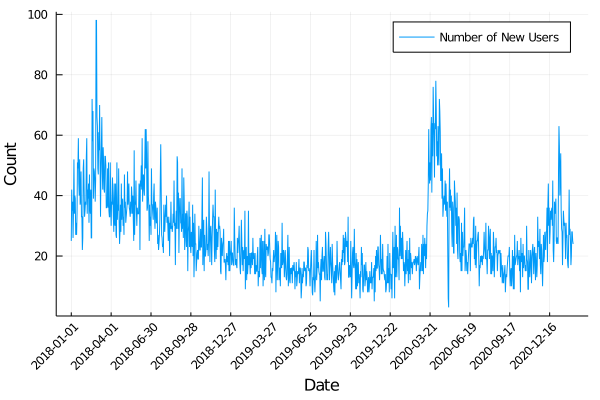

In [32]:
x = minimum(df.date):Day(1):maximum(df.date)
ticks = [x[i] for i in 1:90:length(x)]

plot(x, df.count,
    xlabel="Date",
    ylabel="Count",
    label="Number of New Users",
    xticks=ticks,
    xrotation=45)

# Game Board Backgrounds

In [54]:
bg = CSV.File("20210207_backgrounds.csv"; missingstring="Not Set") |> DataFrame
names = Dict(
    "worlds2020" => "Worlds 2020",
    "lobby-bg" => "The Root",
    "freelancer-bg" => "Freelancer",
    "find-the-truth-bg" => "Find the Truth",
    "push-your-luck-bg" => "Push Your Luck",
    "mushin-no-shin-bg" => "Mushin No Shin",
    "traffic-jam-bg" => "Traffic Jam",
    "monochrome-bg" => "Monochrome",
    "apex-bg" => "Apex",
    "rumor-mill-bg" => "Rumor Mill"
)
transform!(bg, :background => ByRow(x -> get(names, x, "Not Set")) => :background)
sort!(bg, [order(:count, rev=true)])

,background,count
,String,Int64
1,Not Set,22050
2,The Root,3431
3,Monochrome,804
4,Freelancer,517
5,Apex,463
6,Traffic Jam,437
7,Mushin No Shin,406
8,Find the Truth,355
9,Rumor Mill,346
